In [30]:
import pandas as pd

# Veri setlerini yükleyin
netflix_df = pd.read_csv('C:/Users/cmbme/OneDrive/Masaüstü/ML Project/Databases/netflix/netflix_titles.csv')
amazon_df = pd.read_csv('C:/Users/cmbme/OneDrive/Masaüstü/ML Project/Databases/amazon/amazon_prime_titles.csv')

# Temel veri temizliği: release_year ve duration sütunlarında eksik verileri kaldırma
netflix_df.dropna(subset=['release_year', 'duration'], inplace=True)
amazon_df.dropna(subset=['release_year', 'duration'], inplace=True)

# Filmleri ayırma
netflix_movies = netflix_df[netflix_df['type'] == 'Movie'].copy()
amazon_movies = amazon_df[amazon_df['type'] == 'Movie'].copy()

# Filmler için duration'ı dakika olarak ayarlama
netflix_movies['duration'] = netflix_movies['duration'].str.replace(' min', '').astype(int)
amazon_movies['duration'] = amazon_movies['duration'].str.replace(' min', '').astype(int)


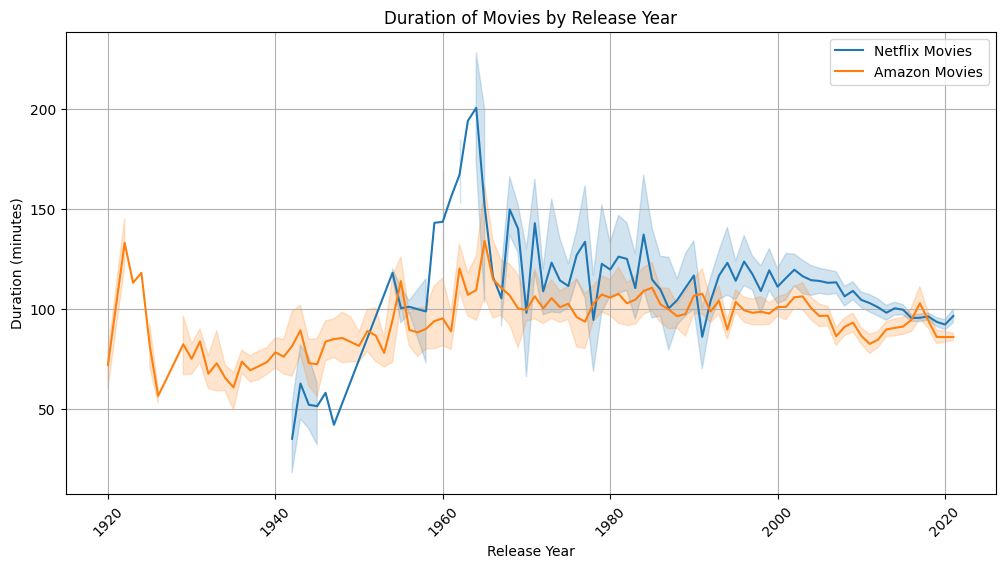

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


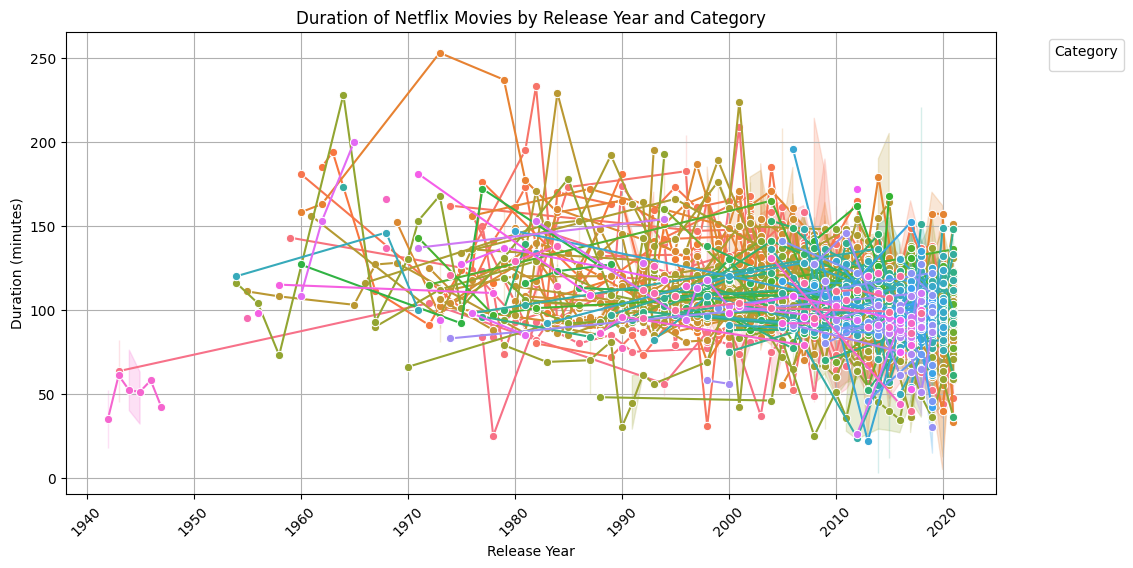

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


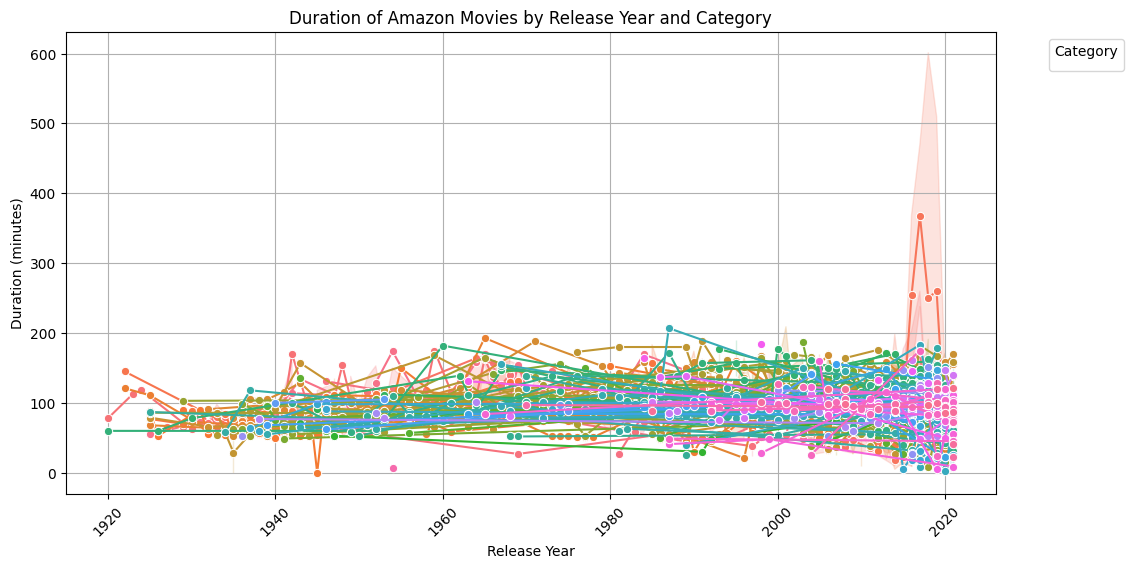

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Genel süre eğilimlerini çizme
plt.figure(figsize=(12, 6))
sns.lineplot(data=netflix_movies, x='release_year', y='duration', label='Netflix Movies')
sns.lineplot(data=amazon_movies, x='release_year', y='duration', label='Amazon Movies')
plt.title('Duration of Movies by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Netflix için kategorilere göre sürelerin yıllara göre dağılımı
plt.figure(figsize=(12, 6))
sns.lineplot(data=netflix_movies, x='release_year', y='duration', hue='listed_in', marker='o', legend=False)
plt.title('Duration of Netflix Movies by Release Year and Category')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Category')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Amazon için kategorilere göre sürelerin yıllara göre dağılımı
plt.figure(figsize=(12, 6))
sns.lineplot(data=amazon_movies, x='release_year', y='duration', hue='listed_in', marker='o', legend=False)
plt.title('Duration of Amazon Movies by Release Year and Category')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Category')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


C:\Users\cmbme\AppData\Local\Temp\ipykernel_16160\2170129438.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_movies.dropna(subset=['release_year', 'duration', 'listed_in'], inplace=True)
C:\Users\cmbme\AppData\Local\Temp\ipykernel_16160\2170129438.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_movies['duration'] = netflix_movies['duration'].str.replace(' min', '').astype(int)


Mean Squared Error: 1.926887996140039e+21
R-squared: -2.7219267486681247e+18


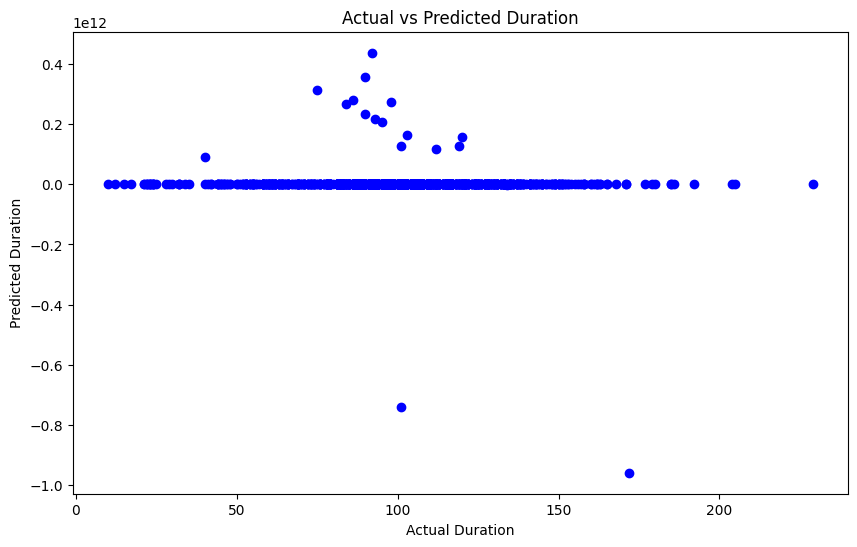

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the CSV file
data_path = 'C:/Users/cmbme/OneDrive/Masaüstü/ML Project/Databases/netflix/netflix_titles.csv'
netflix_data = pd.read_csv(data_path)

# Filter the data to include only movies
netflix_movies = netflix_data[netflix_data['type'] == 'Movie']

# Preprocess the data
# Handle missing values
netflix_movies.dropna(subset=['release_year', 'duration', 'listed_in'], inplace=True)

# Clean the 'duration' column to remove 'min' and convert to integer
netflix_movies['duration'] = netflix_movies['duration'].str.replace(' min', '').astype(int)

# Calculate average duration for each category
average_duration = netflix_movies.groupby('listed_in')['duration'].mean().reset_index()
average_duration.columns = ['listed_in', 'avg_duration']

# Merge the average duration back to the original data
netflix_movies = pd.merge(netflix_movies, average_duration, on='listed_in', how='left')

# Convert categorical data to numerical using one-hot encoding
netflix_movies = pd.get_dummies(netflix_movies, columns=['listed_in'])

# Prepare features and target variable
X = netflix_movies[['release_year', 'avg_duration'] + list(netflix_movies.columns[netflix_movies.columns.str.startswith('listed_in_')])]
y = netflix_movies['duration']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the duration on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, c='blue')
plt.xlabel('Actual Duration')
plt.ylabel('Predicted Duration')
plt.title('Actual vs Predicted Duration')
plt.show()


Linear Regression - Mean Squared Error: 1.926887996140039e+21, R-squared: -2.7219267486681247e+18
Ridge Regression - Mean Squared Error: 427.69694601803445, R-squared: 0.39583423633225634
Lasso Regression - Mean Squared Error: 402.3139359719862, R-squared: 0.4316903390971569
Random Forest - Mean Squared Error: 483.7359881434868, R-squared: 0.31667334683760673


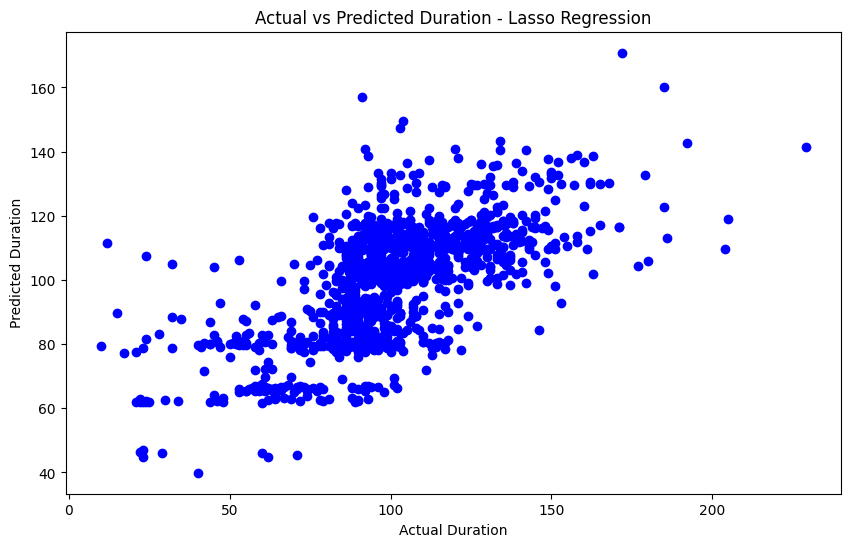

In [19]:
from sklearn.ensemble import RandomForestRegressor


# Identifying different models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor()
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'R2': r2}
    print(f"{model_name} - Mean Squared Error: {mse}, R-squared: {r2}")

# Selecting the best model and visualizing the results
best_model_name = max(results, key=lambda x: results[x]['R2'])
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, c='blue')
plt.xlabel('Actual Duration')
plt.ylabel('Predicted Duration')
plt.title(f'Actual vs Predicted Duration - {best_model_name}')
plt.show()


Linear Regression - Mean Squared Error: 4.137005053625874e+21, R-squared: -5.548543548302835e+18
Ridge Regression - Mean Squared Error: 415.5516294088836, R-squared: 0.4426629210127365
Lasso Regression - Mean Squared Error: 400.1614886161919, R-squared: 0.46330414946081877
Random Forest - Mean Squared Error: 427.4367265472453, R-squared: 0.4267226506497086


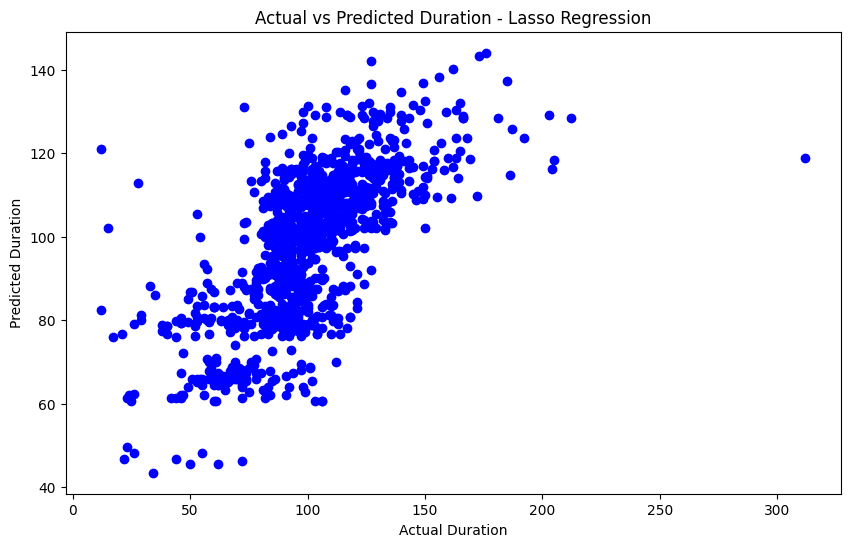

In [22]:
from scipy.stats import zscore


# Detecting outliers with the Z-score method
z_scores = zscore(X.select_dtypes(include=[np.number]))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
X = X[filtered_entries]
y = y[filtered_entries]

# Separating the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identifying different models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor()
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'R2': r2}
    print(f"{model_name} - Mean Squared Error: {mse}, R-squared: {r2}")

# Selecting the best model and visualizing the results
best_model_name = max(results, key=lambda x: results[x]['R2'])
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, c='blue')
plt.xlabel('Actual Duration')
plt.ylabel('Predicted Duration')
plt.title(f'Actual vs Predicted Duration - {best_model_name}')
plt.show()


C:\Users\cmbme\AppData\Local\Temp\ipykernel_16160\474505238.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_movies.dropna(subset=['release_year', 'duration', 'listed_in'], inplace=True)
C:\Users\cmbme\AppData\Local\Temp\ipykernel_16160\474505238.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_movies['duration'] = netflix_movies['duration'].str.replace(' min', '').astype(int)


Lasso Regression - Mean Squared Error: 387.21055601113153, R-squared: 0.4558759136284667
                                               Feature  Coefficient
0                                         release_year    -0.495329
1                                         avg_duration     0.967226
2                         listed_in_Action & Adventure    -0.000000
3         listed_in_Action & Adventure, Anime Features     0.000000
4    listed_in_Action & Adventure, Anime Features, ...     0.000000
..                                                 ...          ...
275                         listed_in_Sci-Fi & Fantasy     0.000000
276              listed_in_Sci-Fi & Fantasy, Thrillers    -0.000000
277                            listed_in_Sports Movies     0.000000
278                          listed_in_Stand-Up Comedy    -0.000000
279                                listed_in_Thrillers     0.000000

[280 rows x 2 columns]


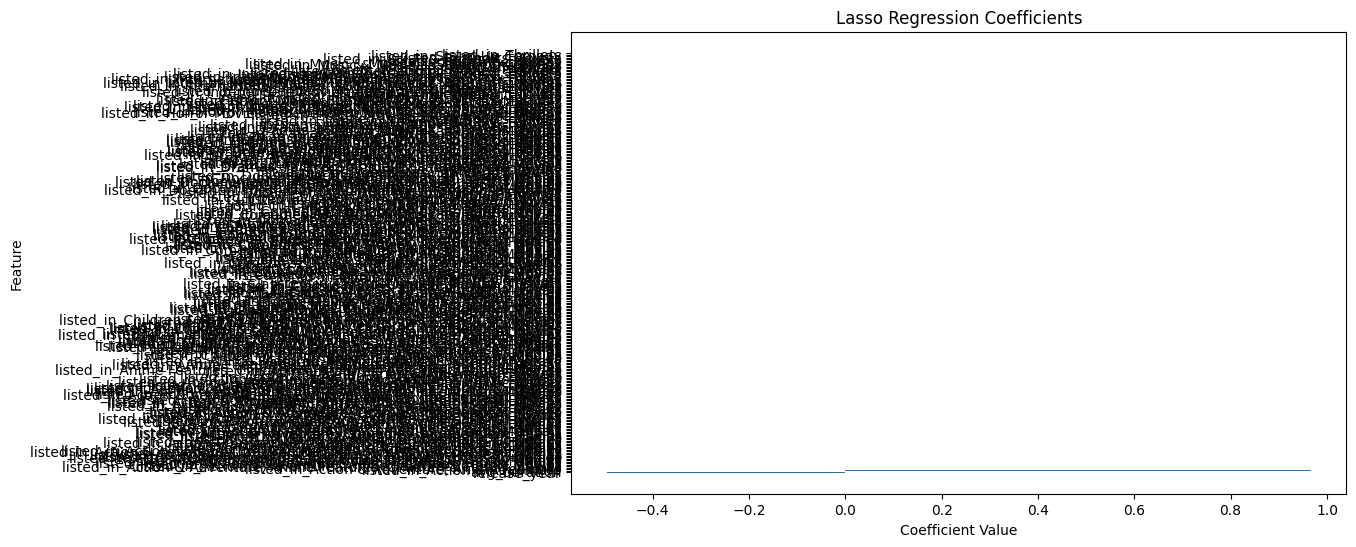

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Load the CSV file
data_path = 'C:/Users/cmbme/OneDrive/Masaüstü/ML Project/Databases/netflix/netflix_titles.csv'
netflix_data = pd.read_csv(data_path)

# Filter the data to include only movies
netflix_movies = netflix_data[netflix_data['type'] == 'Movie']

# Handle missing values
netflix_movies.dropna(subset=['release_year', 'duration', 'listed_in'], inplace=True)

# Clean the 'duration' column and convert to integer
netflix_movies['duration'] = netflix_movies['duration'].str.replace(' min', '').astype(int)

# Calculate average duration for each category
average_duration = netflix_movies.groupby('listed_in')['duration'].mean().reset_index()
average_duration.columns = ['listed_in', 'avg_duration']

# Merge the average duration back to the original data
netflix_movies = pd.merge(netflix_movies, average_duration, on='listed_in', how='left')

# Convert categorical data to numerical using one-hot encoding
netflix_movies = pd.get_dummies(netflix_movies, columns=['listed_in'])

# Prepare features and target variable
X = netflix_movies[['release_year', 'avg_duration'] + list(netflix_movies.columns[netflix_movies.columns.str.startswith('listed_in_')])]
y = netflix_movies['duration']

# Identify and remove outliers using Z-score method
z_scores = zscore(X.select_dtypes(include=[np.number]))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
X = X[filtered_entries]
y = y[filtered_entries]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the Lasso Regression model
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

# Prediction and evaluation
y_pred = lasso_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Lasso Regression - Mean Squared Error: {mse}, R-squared: {r2}")

# Display the model's coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_model.coef_})
print(coefficients)

# Visualize the coefficients
plt.figure(figsize=(10, 6))
plt.barh(coefficients['Feature'], coefficients['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Lasso Regression Coefficients')
plt.show()
